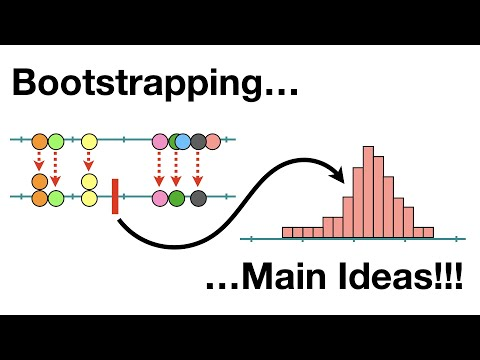

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

In [ ]:
# 1
# Sample mean describes the accuracy or uncertainty of a spread of data, while standard deviation describes the spread of 
# data regarding the original data. In regards to bootstrapping, standard deviation describes the variation between all of
# the resampled statistics, while standard error of the mean represents how much the resampled statistics fluctuate around
# the original mean. When it comes to bootstrapping, the two definitions become closer but there is still some distinction
# between their meanings.

In [ ]:
# 2
# Using the standard error of the mean, we can create a 95% confidence interval by bootstrapping a set of data a bunch of
# times and calculating the bootstrap mean and standard error of the mean for all of these bootstrap instances. Then, find
# the mean of the bootstrapped means, and plug it into a formula including Z score and standard error of the mean, which 
# results in the confidence interval that we are looking for. Formula: CI = bootstrapped means +- Z * SEM

In [ ]:
# 3
# In order to create the same confidence interval from the previous problem without using the standard deviations of the 
# means, we can use percentiles to find the interval. Bootstrap the set of data a bunch of times again and find the means 
# each time. This time, rather than using the formula, we can sort the means in ascending order and then only take the
# middle 95%, which is the 2.5th percentile and the 97.5th.

In [ ]:
# 4
import numpy as np

# Function to compute bootstrap confidence interval
def bootstrap_ci(data, stat_func, num_bootstrap_samples=10000, ci_level=95):
    """
    Calculate the bootstrap confidence interval for a given statistic.
    
    Parameters:
    data: array-like, the sample data
    stat_func: function, the statistic for which the CI is calculated (e.g., np.mean, np.median)
    num_bootstrap_samples: int, number of bootstrap samples to generate (default is 10,000)
    ci_level: float, the confidence level (default is 95%)
    
    Returns:
    tuple: lower and upper bounds of the confidence interval
    """
    # Number of data points
    n = len(data)
    
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrap_stats = []
    for _ in range(num_bootstrap_samples):
        # Generate a bootstrap sample (sampling with replacement)
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # Compute the statistic (mean or median or any other function)
        bootstrap_stat = stat_func(bootstrap_sample)
        bootstrap_stats.append(bootstrap_stat)
    
    # Convert list to numpy array for easier percentile computation
    bootstrap_stats = np.array(bootstrap_stats)
    
    # Compute the percentiles for the given confidence level (e.g., 2.5% and 97.5% for a 95% CI)
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = 100 - lower_percentile
    
    # Return the confidence interval (CI)
    return np.percentile(bootstrap_stats, [lower_percentile, upper_percentile])

# Example sample data
sample_data = np.array([10, 12, 15, 18, 22, 25, 28, 30, 35, 40])

# Compute 95% bootstrap confidence interval for the population mean
ci_mean = bootstrap_ci(sample_data, np.mean)
print(f"95% Bootstrap CI for the population mean: {ci_mean}")

# To compute 95% bootstrap confidence interval for the population median, simply change np.mean to np.median
ci_median = bootstrap_ci(sample_data, np.median)
print(f"95% Bootstrap CI for the population median: {ci_median}")

In [ ]:
# 5
# Population parameter is a fixed characteristic of a population that is taken, it is generally something we want to know
# but will never get the exact number
# Simple statistic is a value calculated from a sample and is used to estimate the population parameter.
# When it comes to confidence intervals, it is important to distinguish between simple statistic and population parameter
# because we use the simple statistic to get a confidence interval that has the chance to include the population paramter

In [ ]:
# 6
# 1. The process of bootstrapping is taking a sample of a population that we have collected, and using what we found in the 
# sample to create more samples from the population
# 2. The main purpose of bootstrapping is to get more diverse data than just the sample that we have in a faster and cheaper
# way that still gets the job done and has a pretty high accuracy when it comes to bootstrapping a lot and estimating the 
# population
# 3. Using that size n sample from the population, take n random points from the sample with replacement to form a new
# sample. After repeating this many times, the bootstrapped samples should give a pretty good estimate for the population
# that we can cross check with the actual population that we have afterwards

In [ ]:
# 7
# If the confidence interval fails to reject the null hypothesis, it means that there is a possibility that, for example in
# this case, the drug does not end up doing anything. With the infinite universes in which we take our confidence interval, 
# it is possible that the drug does not do anything as the confidence interval includes it, regardless of whatever the
# sample mean statistic is.

In [ ]:
# 8
'''
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
'''
# The data does not seem to suggest that the vaccine has any significant improvement on health

In [2]:
import pandas as pd
from scipy import stats

# Create the DataFrame from the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Conduct paired t-test
t_statistic, p_value = stats.ttest_rel(df['InitialHealthScore'], df['FinalHealthScore'])

# Output the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence to suggest the medicine is useful.")
else:
    print("Fail to reject the null hypothesis: There is no evidence to suggest the medicine is useful.")

T-statistic: -2.5901
P-value: 0.0292
Reject the null hypothesis: There is evidence to suggest the medicine is useful.


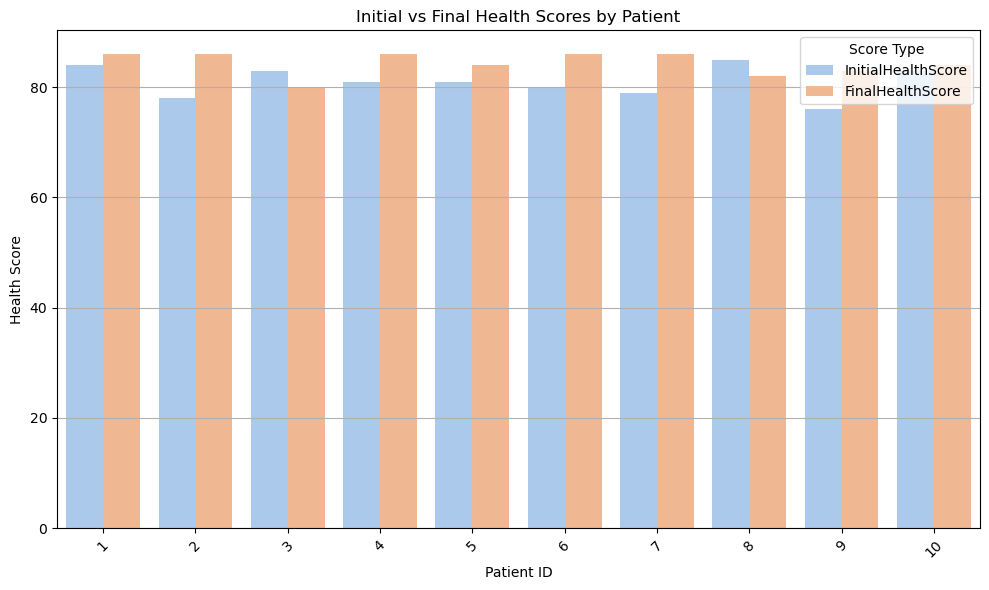

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame from the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for seaborn
df_melted = df.melt(id_vars=['PatientID'], value_vars=['InitialHealthScore', 'FinalHealthScore'],
                    var_name='Score_Type', value_name='Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PatientID', y='Score', hue='Score_Type', data=df_melted, palette='pastel')

# Customize the plot
plt.title('Initial vs Final Health Scores by Patient')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show("png")

# https://chatgpt.com/share/66ff6591-317c-8012-8c1c-6a18decaf19a